# Bank Customer Churn Prediction-III

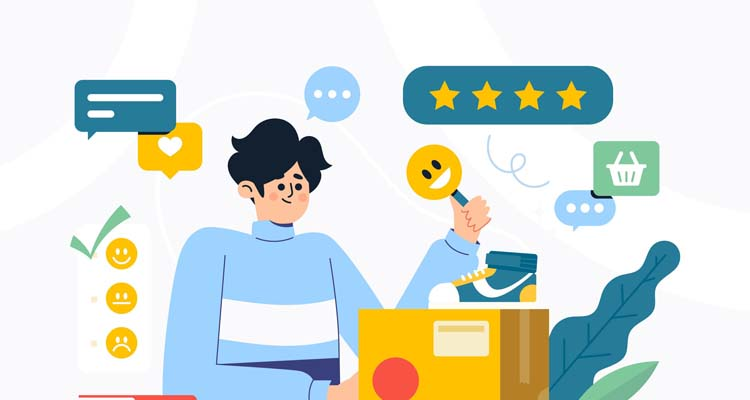

## `Importing libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics  import f1_score,accuracy_score, classification_report, confusion_matrix

In [4]:
from sklearn.model_selection import cross_val_score

## `Reading the dataset`

In [5]:
data=pd.read_csv('Bank Customer Churn Prediction.csv')

In [6]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1807,15605037,818,France,Female,49,2,0.00,1,0,1,192298.84,1
4852,15574137,687,Spain,Male,35,3,0.00,2,1,1,176450.19,0
6006,15636395,529,France,Female,31,5,0.00,2,1,0,26817.23,0
4915,15594409,710,France,Male,45,1,0.00,2,1,1,36154.66,0
5522,15686696,817,France,Female,37,6,81070.34,2,1,0,80985.88,0


In [8]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
data.shape

(10000, 12)

In [10]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [13]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
for col in data:
    print(f'{col}: {data[col].unique()}')

customer_id: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
credit_score: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 

In [15]:
data[['credit_score','balance','estimated_salary']].describe()

,credit_score,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881
std,96.653299,62397.405202,57510.492818
min,350.000000,0.000000,11.580000
25%,584.000000,0.000000,51002.110000
50%,652.000000,97198.540000,100193.915000
75%,718.000000,127644.240000,149388.247500
max,850.000000,250898.090000,199992.480000


In [16]:
data['balance'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [17]:
data['estimated_salary'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


In [18]:
data['credit_score'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


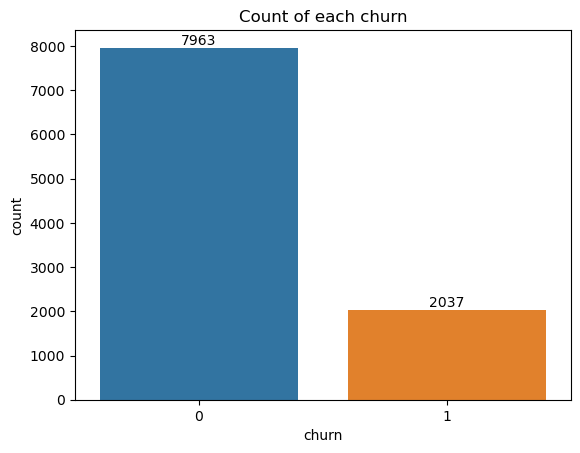

In [19]:
ax=sns.countplot(x=data.churn,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each churn')
plt.show()

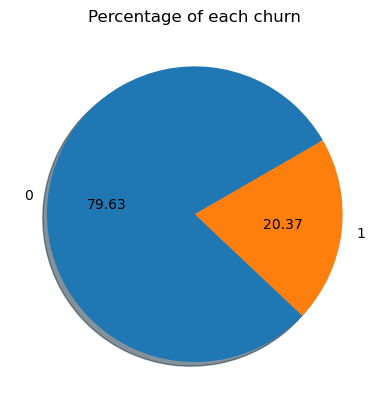

In [20]:
plt.pie(x=data.churn.value_counts(),autopct="%.2f",labels=data.churn.value_counts().index,startangle=30,
       shadow=True)
plt.title('Percentage of each churn')
plt.show()

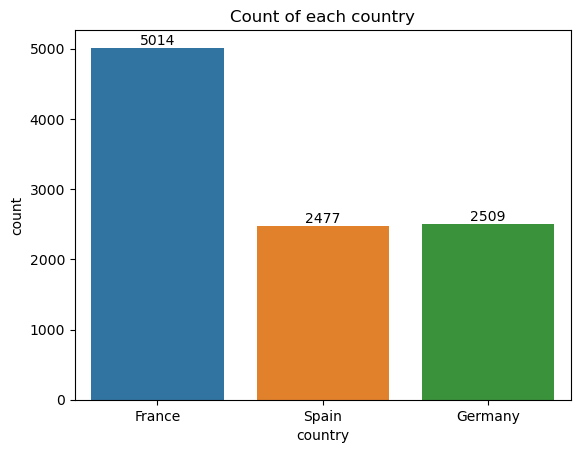

In [21]:
ax=sns.countplot(x=data.country,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each country')
plt.show()

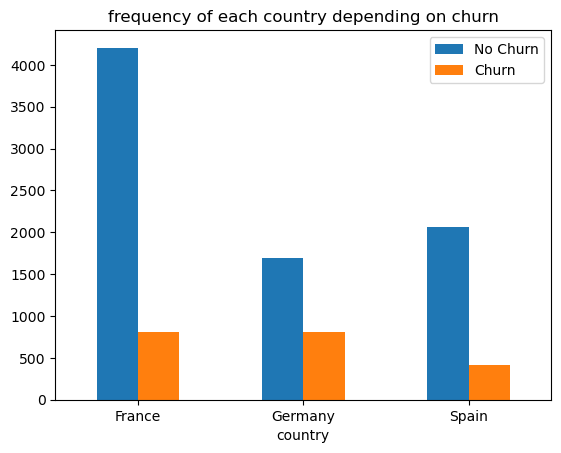

In [22]:
cnty=pd.crosstab(data.country,data.churn)
cnty.plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(["No Churn", "Churn"])
plt.title('frequency of each country depending on churn')
plt.show()

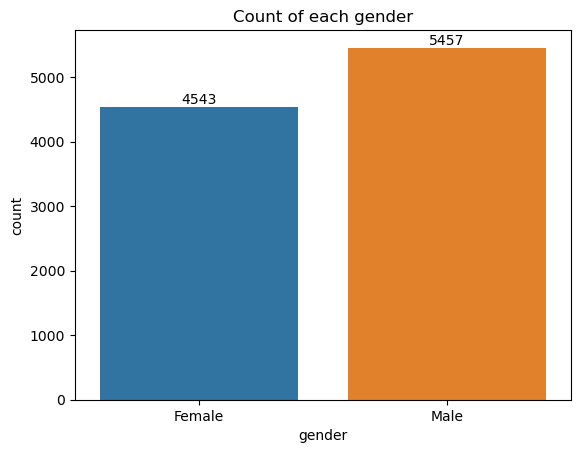

In [23]:
ax=sns.countplot(x=data.gender,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each gender')
plt.show()

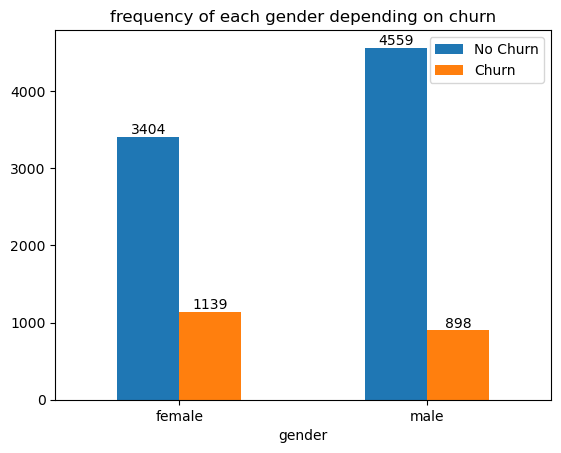

In [24]:
gen=pd.crosstab(data.gender,data.churn)
ax=gen.plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],['female','male'],rotation=0)
plt.legend(["No Churn", "Churn"])
plt.title('frequency of each gender depending on churn')
plt.show()

## `Data Preprocessing`

checking null values

In [25]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

checking duplicate values

In [26]:
data.duplicated().sum()

0

In [27]:
data.gender=data.gender.replace('Male',1)
data.gender=data.gender.replace('Female',0)
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


creating dummies

In [28]:
dummies=pd.get_dummies(data.country)
dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [29]:
data=pd.concat([data,dummies],axis=1)
data=data.drop(['country','Spain'],axis=1)
data

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


## `Train Test Split`

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=data.drop(['customer_id','churn'],axis=1)
y=data.churn

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.70,shuffle=True)

In [33]:
X_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany
9069,619,0,32,4,175406.13,2,1,1,172792.43,0,0
2603,643,0,34,7,160426.07,1,0,1,188533.11,0,1
7738,561,1,33,6,0.00,2,0,0,173680.39,1,0
1579,618,1,41,8,37702.79,1,1,1,195775.48,0,1
5058,714,1,37,9,148466.93,2,0,1,151280.96,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1,0
5191,682,0,58,1,0.00,1,1,1,706.50,1,0
5390,735,0,38,1,0.00,3,0,0,92220.12,1,0
860,667,1,43,8,190227.46,1,1,0,97508.04,1,0


In [34]:
y_train

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 7000, dtype: int64

# Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## `Model`

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(5, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.4878 - accuracy: 0.7926
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.7927
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8060
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8136
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4169 - accuracy: 0.8231
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4073 - accuracy: 0.8323
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8371
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8417
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8469
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3735 - accura

219/219 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8610
Epoch 82/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8607
Epoch 83/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8606
Epoch 84/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8593
Epoch 85/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8617
Epoch 86/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8614
Epoch 87/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3317 - accuracy: 0.8627
Epoch 88/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8599
Epoch 89/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8607
Epoch 90/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 

In [42]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8643


[0.3343551754951477, 0.8643333315849304]

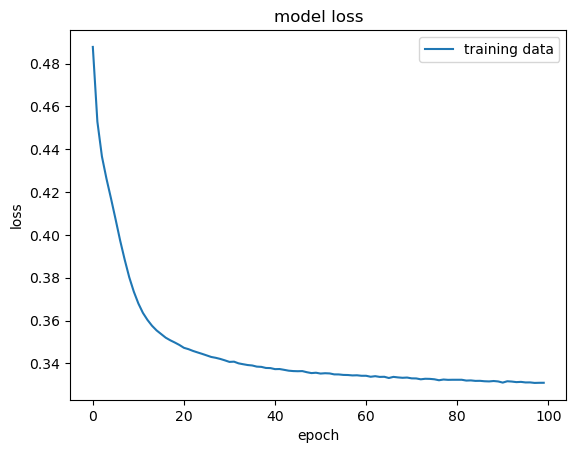

In [43]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

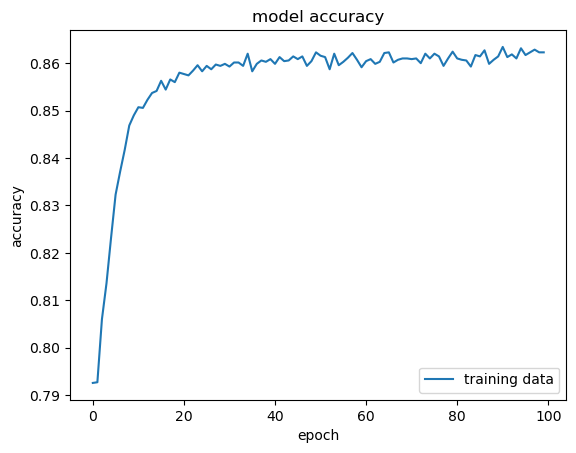

In [44]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [45]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 1s 2ms/step


array([[0.02741246],
       [0.02158957],
       [0.08581365],
       ...,
       [0.06536943],
       [0.0119699 ],
       [0.15939575]], dtype=float32)

In [46]:
y_pred[10]

array([0.8427028], dtype=float32)

In [47]:
y_pred_churn=[1 if ele >0.5 else 0 for ele in y_pred]
y_pred_churn[:11]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [48]:
# training accuracy score
y_pred_churn_train=[1 if ele >0.5 else 0 for ele in model.predict(X_train)]
accuracy_score(y_train,y_pred_churn_train)

219/219 [==============================] - 1s 2ms/step


0.8635714285714285

In [49]:
# testing accuracy score
accuracy_score(y_test,y_pred_churn)

0.8643333333333333

In [50]:
print(classification_report(y_test,y_pred_churn))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [51]:
f1_score(y_test,y_pred_churn)

0.5747126436781609

Text(33.22222222222222, 0.5, 'Truth')

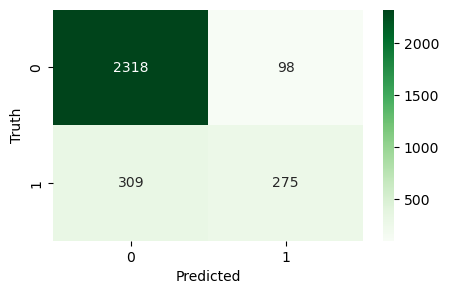

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_churn)

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

## `Prediction`

In [53]:
def gend(sex):
    if sex.lower()=='male':
        return 1
    elif sex.lower()=='female':
        return 0
    else:
        return 'Error'

def country(cy):
    if cy.lower()=='france':
        return [1,0]
    elif cy.lower()=='germany':
        return [0,1]
    elif cy.lower()=='spain':
        return [0,0]
    else:
        return ['Error']
    
def predict(l):
    '''input=['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
           'balance', 'products_number', 'credit_card', 'active_member','estimated_salary']'''
    l=l[1:]
    cnty=l.pop(1)
    l+=country(cnty)
    l[1]=gend(l[1])
    #print(l)
    try:
        pred_data = 1 if (model.predict(scaler.transform([l]))[0] > 0.5) else 0 
        return "Yes" if pred_data==1 else "No"
    except ValueError:
        return "Error: Entered wrong input format"

In [54]:
predict([88855111, 120, 'Germany', 'female', 22, 1, 159999.88, 3, 1, 0, 12500])

1/1 [==============================] - 0s 28ms/step


'Yes'

In [55]:
predict([26851945, 643, 'spain', 'Male', 23, 2, 0, 1, 1, 1, 7000])

1/1 [==============================] - 0s 33ms/step


'No'